In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [16]:
df = pd.read_csv("../data/processed/macro_monthly_clean.csv")

In [17]:
df = df.sort_values(["year", "month"]).reset_index(drop=True)
df.head()

,year,month,bi_rate,inflation,period
0,2016,4,5.50,3.60,2016-04
1,2016,5,5.50,3.33,2016-05
2,2016,6,5.25,3.45,2016-06
3,2016,7,5.25,3.21,2016-07
4,2016,8,5.25,2.79,2016-08


In [18]:
df["date"] = pd.to_datetime(df["period"])

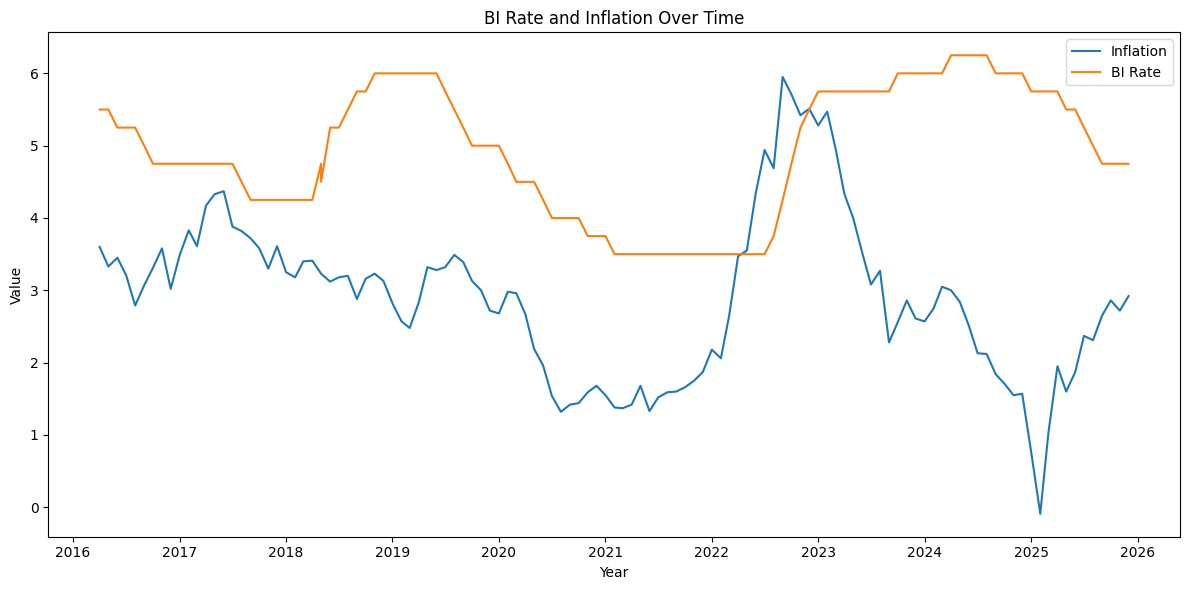

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(df["date"], df["inflation"], label="Inflation")
plt.plot(df["date"], df["bi_rate"], label="BI Rate")

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("BI Rate and Inflation Over Time")

# tampilkan tick per tahun
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.legend()
plt.tight_layout()
plt.show()

In [24]:
df["inflation_ma_3"] = df["inflation"].rolling(window=3).mean()
df["inflation_ma_6"] = df["inflation"].rolling(window=6).mean()

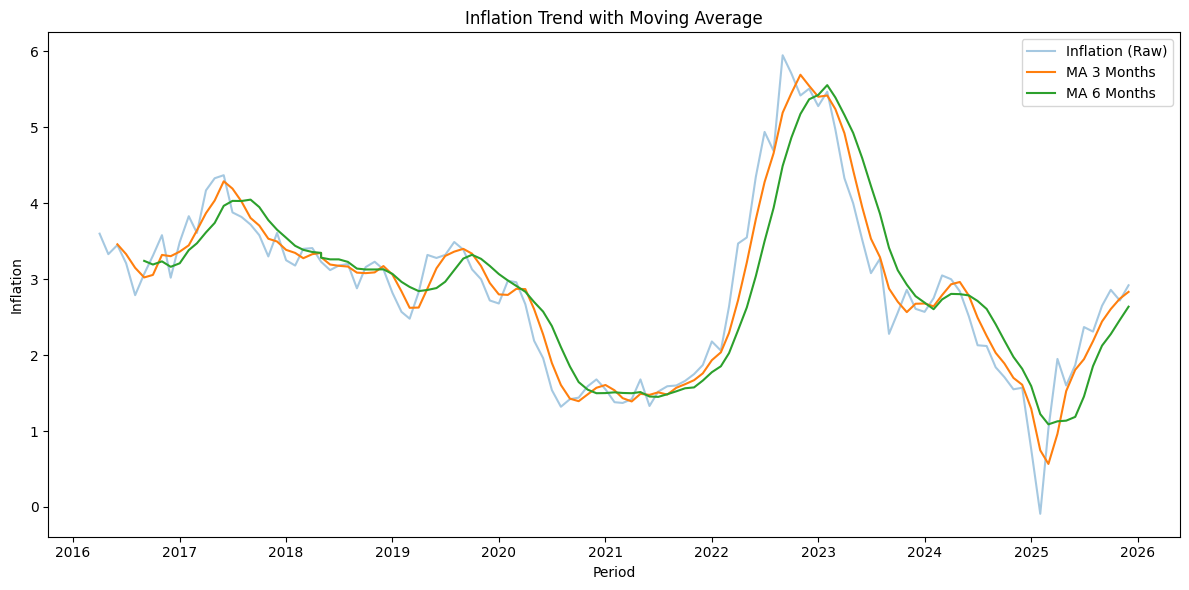

In [31]:
plt.figure(figsize=(12, 6))

plt.plot(df["date"], df["inflation"], alpha=0.4, label="Inflation (Raw)")
plt.plot(df["date"], df["inflation_ma_3"], label="MA 3 Months")
plt.plot(df["date"], df["inflation_ma_6"], label="MA 6 Months")

plt.xlabel("Period")
plt.ylabel("Inflation")
plt.title("Inflation Trend with Moving Average")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.legend()
plt.tight_layout()
plt.show()

In [27]:
df["bi_rate_ma_3"] = df["bi_rate"].rolling(window=3).mean()

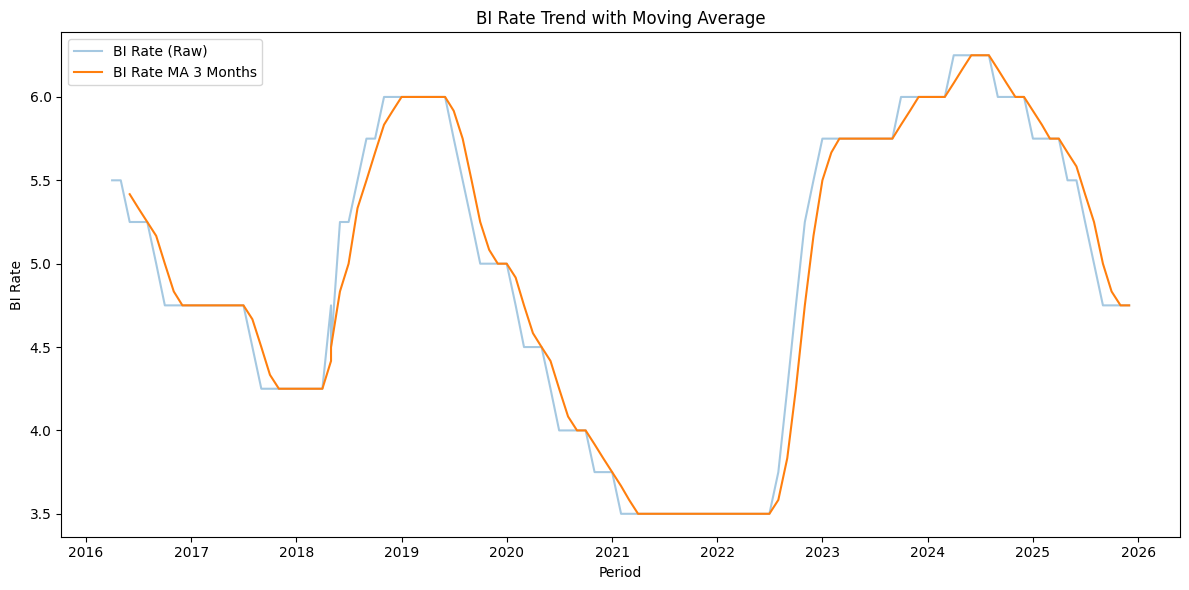

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(df["date"], df["bi_rate"], alpha=0.4, label="BI Rate (Raw)")
plt.plot(df["date"], df["bi_rate_ma_3"], label="BI Rate MA 3 Months")

plt.xlabel("Period")
plt.ylabel("BI Rate")
plt.title("BI Rate Trend with Moving Average")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.legend()
plt.tight_layout()
plt.show()

### Step 3 — Exploratory Data Analysis (EDA)

This step explores the historical behavior of BI Rate and inflation through time-series visualization 
and moving average analysis. The objective is to identify broad patterns, trends, and potential time lags 
before conducting formal statistical analysis.

### Key Observations

- BI Rate exhibits a stepwise pattern, reflecting its role as a policy-controlled interest rate.
- Inflation displays greater short-term volatility, but clear medium-term trends emerge when viewed using moving averages.
- Visual inspection suggests that changes in inflation do not occur simultaneously with changes in BI Rate.

### Moving Average Analysis

Applying 3-month and 6-month moving averages helps smooth short-term fluctuations in inflation and 
highlights underlying trends. The smoothed series indicates that shifts in inflation tend to occur 
after periods of sustained changes in BI Rate.

### Interpretation

Overall, the exploratory analysis suggests that the relationship between BI Rate and inflation is not instantaneous. 
Instead, the observed patterns indicate a delayed response, supporting the use of lag-based correlation and regression 
methods in subsequent analysis steps.